# Data Comprehension
    1) Rename the columns to for ease of interpetability


In [1]:
# import libraries 

# utility/data wrangling
import pandas as pd
import numpy as np

# chart creations
import matplotlib.pyplot as plt
import seaborn as sns

# pre processing
from sklearn.preprocessing import minmax_scale

# model selection
from sklearn.model_selection import train_test_split, cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Validation 
from sklearn.metrics import f1_score, accuracy_score, recall_score

# statistical testing
from scipy.stats import f_oneway
from scipy import stats

%matplotlib inline

#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 


### Map the old column names to new ones

In [4]:
# import the data 

df = pd.read_csv('../data/training_data.csv')
df.head(1)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,28835,220000,2,1,2,36,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1


In [5]:
# Change the column names.
column_names = df.iloc[18381].to_list()
column_names[-1] = 'default'
column_names[0] = 'id'
df.columns = [x.lower() for x in column_names]
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,28835,220000,2,1,2,36,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,25329,200000,2,3,2,29,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
2,18894,180000,2,1,2,27,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3,690,80000,1,2,2,32,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,6239,10000,1,2,2,27,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1


In [6]:
df.columns.to_list()

['id',
 'limit_bal',
 'sex',
 'education',
 'marriage',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'default']

### Check for missing values and datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 25 columns):
id           22500 non-null object
limit_bal    22500 non-null object
sex          22500 non-null object
education    22500 non-null object
marriage     22500 non-null object
age          22500 non-null object
pay_0        22500 non-null object
pay_2        22500 non-null object
pay_3        22500 non-null object
pay_4        22500 non-null object
pay_5        22500 non-null object
pay_6        22500 non-null object
bill_amt1    22500 non-null object
bill_amt2    22500 non-null object
bill_amt3    22500 non-null object
bill_amt4    22500 non-null object
bill_amt5    22500 non-null object
bill_amt6    22500 non-null object
pay_amt1     22500 non-null object
pay_amt2     22500 non-null object
pay_amt3     22500 non-null object
pay_amt4     22500 non-null object
pay_amt5     22500 non-null object
pay_amt6     22500 non-null object
default      22500 non-null object
dtypes: object(2

- There are no missing values but all of the columns are currently as objects.
- drop the row containing the column names and cast the remaining columns as int
    - Because there are no decimal values, there is no need to use floating points

In [10]:
# remove the name column
df = df[df.index != 18381]

# cast the remaining columns to int
df = df.astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22499 entries, 0 to 22499
Data columns (total 25 columns):
id           22499 non-null int64
limit_bal    22499 non-null int64
sex          22499 non-null int64
education    22499 non-null int64
marriage     22499 non-null int64
age          22499 non-null int64
pay_0        22499 non-null int64
pay_2        22499 non-null int64
pay_3        22499 non-null int64
pay_4        22499 non-null int64
pay_5        22499 non-null int64
pay_6        22499 non-null int64
bill_amt1    22499 non-null int64
bill_amt2    22499 non-null int64
bill_amt3    22499 non-null int64
bill_amt4    22499 non-null int64
bill_amt5    22499 non-null int64
bill_amt6    22499 non-null int64
pay_amt1     22499 non-null int64
pay_amt2     22499 non-null int64
pay_amt3     22499 non-null int64
pay_amt4     22499 non-null int64
pay_amt5     22499 non-null int64
pay_amt6     22499 non-null int64
default      22499 non-null int64
dtypes: int64(25)
memory usage: 4.5 MB


Now that we have renamed our columns, checked for missing values and data types, I am ready to begin cleaning and wrangling my data.

First let's check for outliers/data integrity. To achieve this, I will use describe()

In [11]:
df.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,...,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,14951.920308,167054.521534,1.603227,1.855282,1.553358,35.447931,-0.014090,-0.128806,-0.160185,-0.214587,...,43329.149562,40306.373039,38955.000356,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301,0.223477
std,8663.502421,129864.960118,0.489239,0.791905,0.521418,9.237634,1.123191,1.197954,1.198880,1.174824,...,64607.088483,60918.993067,59773.144959,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398,0.416584
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7419.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2319.500000,1732.500000,1230.000000,1000.000000,8.290000e+02,396.000000,284.000000,246.500000,100.000000,0.000000
50%,14947.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19048.000000,18050.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22441.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54494.500000,50196.000000,49250.000000,5002.000000,5.000000e+03,4500.000000,4000.000000,4068.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,388071.000000,528666.000000,1.000000


In [12]:
df[['bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',]].describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000
mean,51455.869416,49385.313214,4.704213e+04,43329.149562,40306.373039,38955.000356
std,74470.257248,71953.814345,6.991792e+04,64607.088483,60918.993067,59773.144959
min,-165580.000000,-69777.000000,-1.572640e+05,-81334.000000,-81334.000000,-339603.000000
25%,3506.000000,2975.000000,2.611500e+03,2319.500000,1732.500000,1230.000000
50%,22387.000000,21145.000000,2.005300e+04,19048.000000,18050.000000,16924.000000
75%,66988.500000,63755.000000,6.016100e+04,54494.500000,50196.000000,49250.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


#### limit_bal
- These values all seem reasonable. The minimum is 10000 NTD which is approxiamtely 350 USD and the maximum is 1000000 which is close to 35,000 USD which seem like a reasonable range for credit. All of the values 

#### sex 
- Only two values, 1 = male; 2 = female. Let's change it to a 'male' column where 1 is male and 0 is female

#### education
- From the data description: X3: Education (1 = graduate school; 2 = university; 3= high school; 4 = others).
- I don't want to assume that anything above a 4 is alternative forms of education. But likely there are are only 4 levels of education that matter.

#### marriage status
- From the data description: X4: Marital status (1 = married; 2 = single; 3 = others).
- It is unclear what '3' means in this context. I will see if there is any clustring in that '3' group to see if there is clustering or binning that needs to occur therein.

#### age
- The minimum age for a credit card in taiwan in 20 so it is reasonable that the minimum age is 20. 
- the maximum age for a credit card in taiwan is 70, however, at the time of the data (2005) that may have been different.
- The mean and median ages are very close, which indicates the dstribution of data is not skewed.

#### Repayment status (pay_0-pay_6)
- -1 in this instance means no irregularities or 'paid duly'
- 1 to 8 means that the payments have been delayed for that many months
    - It is strange that there is no late fees longer than 8 months.
        - what happens to people after 8 months?

#### Bill amount (bill_amnt_0-6)
- The amount owing each month.
- There are no major irregularities. There are some exceptionally large numbers in one of the columns. 
- I think this may represent interest payments going above the credit limit. 
     - for instance, people who have gone way over there credit limits may atually represent individuals with a solid payment history. However, reports indicate that there was a financial crisis in Taiwan in 2005
     

#### Amount of payment (pay_amnt_0 - 6)
- This is going to be a fascinating column. Particularly, the relationship between the amount owing and the amount payable. According to research, there were individuals called credit card slaves. This poor individuals would be forced to only pay the minimum amount of money possible. 

#### default
- The target class. Here I only need to check for instances of class imbalance. 

# Data Cleaning/Eda

Now that i understand my columns, I need to start visualising the data to answer some questions.
- Renaming the 

### Class imbalance

There are a little over 3x the number of 

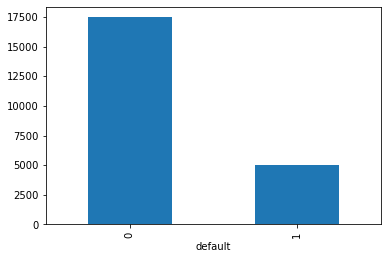

In [101]:
df.groupby(['default']).id.count().plot(kind='bar')

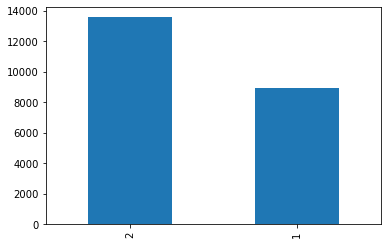

In [13]:
# which gender is which?
df.sex.value_counts().plot(kind='bar');

In [14]:
def is_male(n):
    if n == 2:
        return 0
    else: 
        return n

df.sex = df.sex.apply(is_male)

# Change the column name to 'male'

df.columns = ['male' if x == 'sex' else x for x in df.columns]

In [15]:
df.head()

,id,limit_bal,male,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,28835,220000,0,1,2,36,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,25329,200000,0,3,2,29,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
2,18894,180000,0,1,2,27,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3,690,80000,1,2,2,32,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,6239,10000,1,2,2,27,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1


In [17]:
# save the progress
df.to_csv('./data/training_cleaning.csv', index=None)

In [18]:
df1 = pd.read_csv('./data/training_cleaning.csv')

Now that I have had an initial look into the data, checked for missing values and the like, I will start to handle each column's nuance individually.

## Education

For education I will cap the education at 4

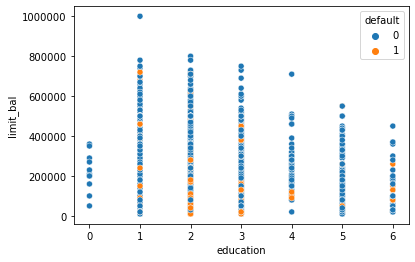

In [20]:
sns.scatterplot(data=df1, x='education', y='limit_bal', hue='default')

Let's see what the count is for each group. There are almost no observations in any of the groups larger than 3. From the documentation, there is no evidence that there is any group other than 1,2,3,4. So Let's bin all of the 4+ into 1 category

In [29]:
df1.groupby(['education']).limit_bal.count().sort_values()#.plot(kind='bar')

education
0       11
6       42
4       90
5      208
3     3713
1     7919
2    10516
Name: limit_bal, dtype: int64

In [104]:
# Categorize the education levels, compare all categories to high_school

def education_categories(n):
    if n > 3 or n == 0:
        return 'other'
    elif n == 3:
        return 'high_school'
    elif n == 2:
        return 'university'
    elif n == 1:
        return 'post_grad'

    
edu_cat = df1.education.apply(education_categories)
df1.education = edu_cat
edu_cat_dummies = pd.get_dummies(edu_cat, drop_first=True)
edu_cat_dummies

,other,post_grad,university
0,0,1,0
1,0,0,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
22494,0,0,1
22495,0,1,0
22496,0,0,0
22497,0,0,0


## Marriage

Let's do the same for marriage status, dummy the columns. I do not know what 'other' means in this scenario. I think it is better to just bin people into either married or not married. 

1='married', 2='not married'

In [195]:
df1.groupby(['marriage']).limit_bal.count().sort_values()#.plot(kind='bar')

marriage
0       44
3      234
1    10195
2    12026
Name: limit_bal, dtype: int64

In [196]:
def marriage_categorization(n):
    if n == 1:
        return 'married'
    else: 
        return 'not_married'

mar_cat = df1.marriage.apply(marriage_categorization)
mar_cat_dummies = pd.get_dummies(mar_cat, drop_first=True)

## Limit_bal

I wonder if limit_bal is actually a continuous variable or a discrete variable. It could actually behave a little bit more like categorical data then anything else since the credit limit is determined by a lot of factors relating to a persons financial situation.

There are only 80 unique values

In [197]:
df1.limit_bal.value_counts().sort_values(ascending=False)

50000      2534
20000      1488
30000      1223
80000      1210
200000     1134
           ... 
1000000       1
740000        1
690000        1
800000        1
327680        1
Name: limit_bal, Length: 80, dtype: int64

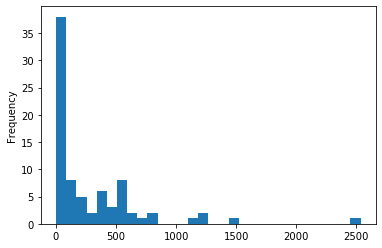

In [198]:
df1.limit_bal.value_counts().sort_index(ascending=False).plot(kind='hist', bins=30)

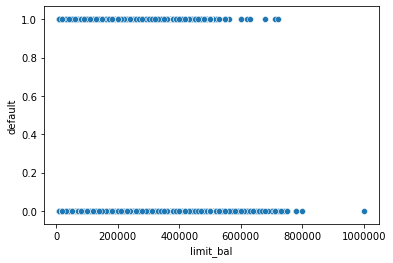

In [199]:
sns.scatterplot(data=df1, x='limit_bal', y='default')

In [200]:
default = df1[df1.default == 1]
not_default = df1[df1.default == 0]

stats.ttest_ind(default.limit_bal, not_default.limit_bal, equal_var=False)

Ttest_indResult(statistic=-25.450055039917036, pvalue=4.291842502785924e-138)

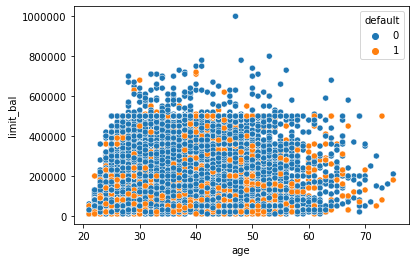

In [142]:
sns.scatterplot(data=df1, x='age', y='limit_bal', hue='default')

### ylim is discrete not continuous. 
When you zoom in, you find that there are regular intervals of every 10000. A useful metric may be the proportion of defaulters as the limit_bal increases

In [154]:
# Calculate the proportion for each stratat
def calculate_prop(df, column):
    total = df.groupby([column]).id.count()
    defaulter = df[df.default == 1].groupby([column]).id.count()
    proportion = defaulter/total
    return proportion

proportion = calculate_prop(df1, 'limit_bal')
proportion = proportion.replace(np.nan, 0)


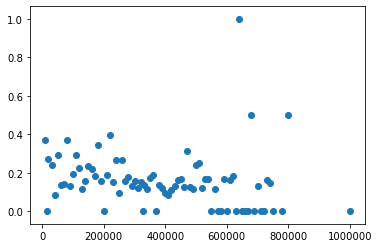

In [160]:
plt.scatter(df1.limit_bal.unique(), proportion)

These results are little bit difficult to interpret. Let's cut the results into different bins and then repeat the process.

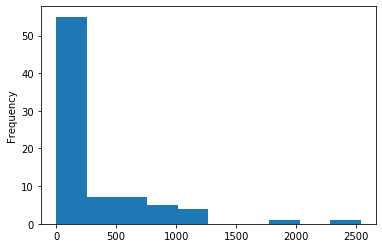

In [169]:
credit_limit_categories = pd.cut(df1.limit_bal, 80)
credit_limit_categories
df1['limit_cat_10'] = credit_limit_categories
df1.groupby(['limit_cat_10']).id.count().plot(kind='hist')

In [202]:
# categorize based on IQR
df.limit_bal.describe()

def limit_bal_tocat(n):
    if n <= 50000:
        return 'low'
    elif  n <= 140000:
        return 'low_mid'
    elif n <= 240000:
        return 'high_mid'
    else:
        return 'high'
    
df1['limit_cat'] = df1.limit_bal.apply(limit_bal_tocat)

default = df1[df1.default==1]
non_default = df1[df1.default==0]
limit_cat_dummies = pd.get_dummies(df1.limit_cat)

## Payment

if in any given month the payment is on time, the month has a -1. Let's sum up all of the value accross the data frame as a measure of delinquency

In [246]:
pay = [
    'pay_0',
    'pay_2',
    'pay_3',
    'pay_4',
    'pay_5',
    'pay_6',
]

df1[pay].describe()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,-0.014090,-0.128806,-0.160185,-0.214587,-0.259700,-0.287613
std,1.123191,1.197954,1.198880,1.174824,1.139984,1.154249
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


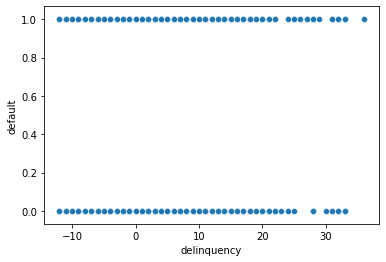

In [264]:
# sum the payments accross the columns
delinquency  = df1[pay].sum(axis=1)
df1['delinquency'] = delinquency
sns.scatterplot(data=df1, x='delinquency', y='default', x_jitter=3, y_jitter=10);

In [256]:
stats.ttest_ind(df1[df1.default==1].delinquency, df1[df1.default==0].delinquency, equal_var=False)

Ttest_indResult(statistic=36.40565546035994, pvalue=6.002242065702443e-264)

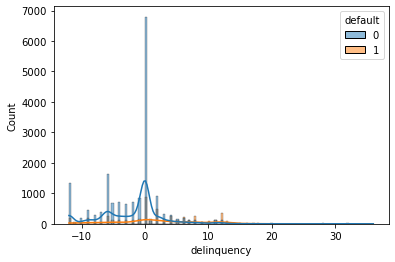

In [259]:
sns.histplot(data=df1, x='delinquency', hue='default', kde=True)

Let's make the column associated with the percentage paid each month and then create a credit usage column

In [121]:
df1.columns.to_list()

bills = [
    'bill_amt1',
    'bill_amt2',
    'bill_amt3',
    'bill_amt4',
    'bill_amt5',
    'bill_amt6'
]

payments = [
     'pay_amt1',
     'pay_amt2',
     'pay_amt3',
     'pay_amt4',
     'pay_amt5',
     'pay_amt6',
]

account_balance = df1.limit_bal - df1[bills].sum(axis=1) + df1[payments].sum(axis=1)
df1['account_balance'] = account_balance

# credit utility
df1['credit_utility'] = df1['account_balance'] / df1.limit_bal *100

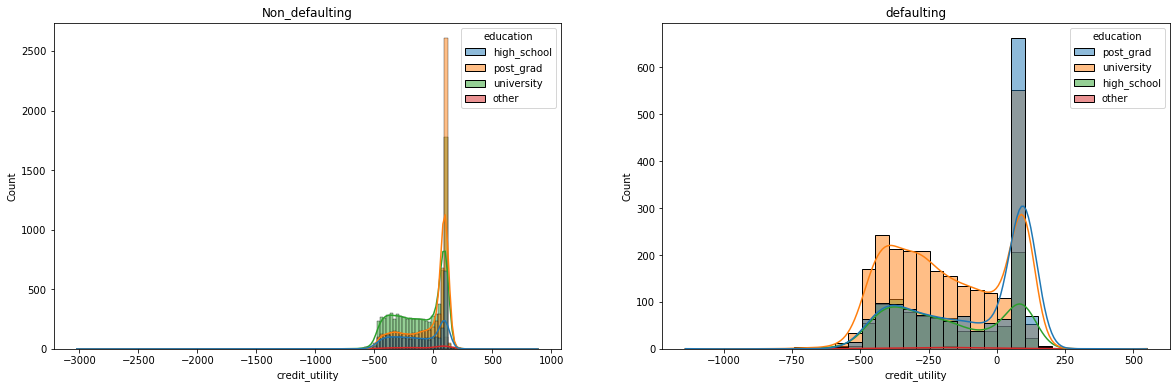

In [125]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
ax1.set_title('Non_defaulting')

ax2 = fig.add_subplot(122)
ax2.set_title('defaulting')
g1 = sns.histplot(data=df1[df1.default==0], x='credit_utility', hue='education',kde=True, ax=ax1)
g2 = sns.histplot(data=df1[df1.default==1], x='credit_utility', hue='education',kde=True, ax=ax2);

sns.color_palette("hls", 8);



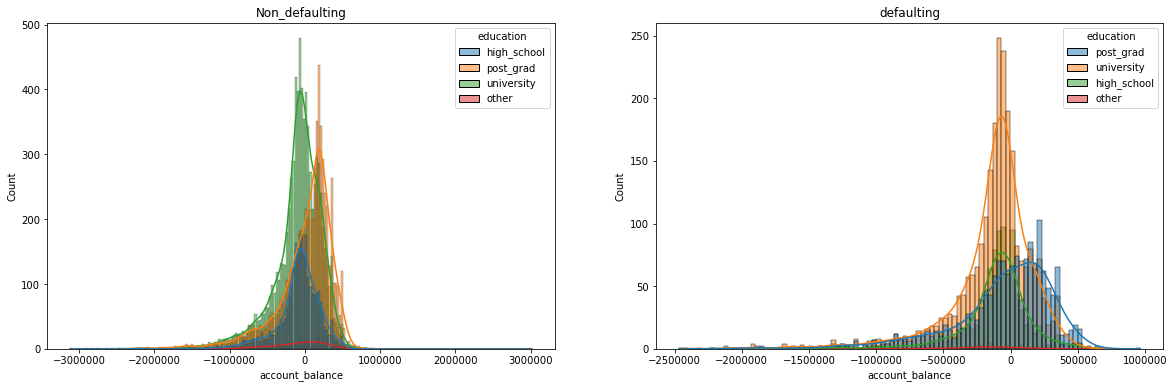

In [124]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
ax1.set_title('Non_defaulting')

ax2 = fig.add_subplot(122)
ax2.set_title('defaulting')
g1 = sns.histplot(data=df1[df1.default==0], x='account_balance', hue='education',kde=True, ax=ax1)
g2 = sns.histplot(data=df1[df1.default==1], x='account_balance', hue='education',kde=True, ax=ax2);

sns.color_palette("hls", 8);



### The distribtion of  credit utility and account balance appears to be different between education levels.

I will conduct a series a of tests to check if 

In [126]:
default = df1[df1.default==1]
non_default = df1[df1.default==0]

In [132]:
default[default.education=='university'].credit_utility.describe()

count    2518.000000
mean     -176.192740
std       205.836886
min      -843.817500
25%      -356.634545
50%      -197.504375
75%        43.324906
max       548.123333
Name: credit_utility, dtype: float64

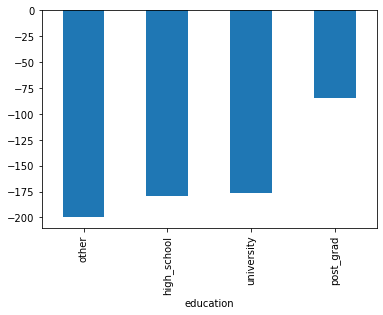

In [140]:
default.groupby('education').credit_utility.mean().sort_values().plot(kind='bar')

In [133]:
non_default[non_default.education=='university'].credit_utility.describe()

count    7998.000000
mean     -115.427532
std       203.369204
min     -3022.135000
25%      -290.817363
50%       -79.396667
75%        90.154313
max       388.050000
Name: credit_utility, dtype: float64

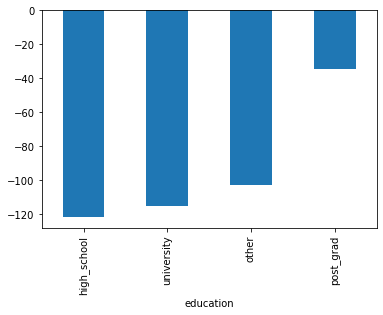

In [139]:
non_default.groupby('education').credit_utility.mean().sort_values().plot(kind='bar')

There are some "over spenders", however, let's pull out the 

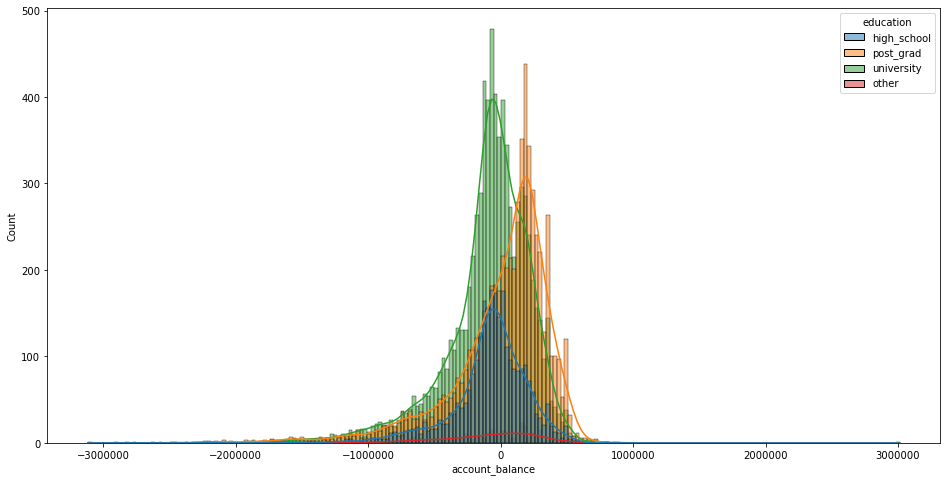

In [204]:
edu_cat_dummies

,other,post_grad,university
0,0,1,0
1,0,0,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
22494,0,0,1
22495,0,1,0
22496,0,0,0
22497,0,0,0


# Modeling 

Let's create a baseline model and see if we can improve upon it.

In [224]:
df1.columns.to_list()

['id',
 'limit_bal',
 'male',
 'education',
 'marriage',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'default',
 'account_balance',
 'crdit_usage',
 'credit_usage',
 'credit_utility',
 'limit_cat_10',
 'limit_cat']

In [225]:
# Test data set
to_drop = [
    'id', 
#     'limit_bal',
    'crdit_usage',
    'credit_usage',
    'limit_cat_10',
    'limit_cat',
    'education',
    'pay_0',
    'pay_2',
    'pay_3',
    'pay_4',
    'pay_5',
    'pay_6',
    'bill_amt1',
    'bill_amt2',
    'bill_amt3',
    'bill_amt4',
    'bill_amt5',
    'bill_amt6',
    'pay_amt1',
    'pay_amt2',
    'pay_amt3',
    'pay_amt4',
    'pay_amt5',
    'pay_amt6',
]
df_test = df1.drop(columns=to_drop)
df_model = pd.concat([df_test, edu_cat_dummies, limit_cat_dummies], axis=1)
df_model

,limit_bal,male,marriage,age,default,account_balance,credit_utility,other,post_grad,university,high,high_mid,low,low_mid
0,220000,0,2,36,1,-841412,-382.460000,0,1,0,0,1,0,0
1,200000,0,2,29,0,200000,100.000000,0,0,0,0,1,0,0
2,180000,0,2,27,0,180000,100.000000,0,1,0,0,1,0,0
3,80000,1,2,32,0,-189891,-237.363750,0,0,1,0,0,0,1
4,10000,1,2,27,1,-16610,-166.100000,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,40000,0,1,38,1,-183978,-459.945000,0,0,1,0,0,1,0
22495,350000,1,1,42,0,356851,101.957429,0,1,0,1,0,0,0
22496,100000,0,2,46,0,94118,94.118000,0,0,0,0,0,0,1
22497,20000,0,1,50,1,15448,77.240000,0,0,0,0,0,1,0


In [239]:
X = df_model.drop(columns=['default'])
y = df_model[['default']]

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.25,
                                                    random_state = 42)

X_train.shape, X_test.shape

((16874, 13), (5625, 13))

In [241]:
cross_val_score(forest,X_train, y_train, cv=5, scoring='f1')

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/s

array([0., 0., 0., 0., 0.])

In [235]:
logReg = LogisticRegression(class_weight='balanced', max_iter=10**3, C=1, penalty='l1', solver = 'saga')
cross_val = cross_val_score(logReg, X_train, y_train.default, scoring='f1', cv=10)
np.mean(cross_val), np.std(cross_val)

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/TjH/opt/anaconda3/envs/learn-env/lib/pyth

(0.34315180324769623, 0.014221391320835653)

In [236]:
X = df.drop(columns=['default', 'id'])
y = df[['default']]

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.25,
                                                    random_state = 42)

X_train.shape, X_test.shape

((16874, 23), (5625, 23))

In [237]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
forest.score(X_train, y_train)

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.820789380111414

In [238]:
cross_val_score(forest,X_train, y_train.default, cv=5, scoring='f1')

array([0.39653513, 0.39245283, 0.40774908, 0.43014706, 0.41977612])

In [207]:
# Instantiate models

logReg = LogisticRegression(random_state=42,
                           max_iter = 10**4,
                            class_weight='balanced',
#                             penalty='l1',
#                             C=1
                            )
kNN = KNeighborsClassifier(n_neighbors=5, n_jobs= -1)
randFor = RandomForestClassifier(n_jobs= -1)
dTree = DecisionTreeClassifier()

models = [logReg,kNN,randFor, dTree ]

In [ ]:
values = np.linspace(0, 1, 100)

models = [LogisticRegression(penalty='l1', C=value) for value in c_values]

fit = [model.fit(X_train, y_train) for model in models]

predictions = [model.predict(X_test) for model in fit]

f1 = [f1_score(y_test, prediction) for prediction in predictions]

list(zip([x/100 for x in c_values], auc))

In [193]:
# Create a scoring function that automatically runs through my models
def score_me(X,y, models):
    scores = {}
    for model in models:
        scores[str(model)[:5]] = cross_val_score(model,
                                                 X,y,
                                                 scoring='f1',
                                                 cv=10
                                                 )
    return scores
        

In [194]:
cross_val_score(logReg,X_train, y_train.default, cv=5, scoring='f1')

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


array([nan, nan, nan, nan, nan])

In [90]:
scoring_dict = score_me(X_train, y_train.price, models)

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [91]:
scoring_dict

{'Logis': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'KNeig': array([0.21206581, 0.24604569, 0.27826087, 0.21837088, 0.25500911,
        0.21785714, 0.20466786, 0.23426573, 0.26343154, 0.2573913 ]),
 'Rando': array([0.40421793, 0.5409015 , 0.47315436, 0.45973154, 0.48474576,
        0.41197183, 0.45283019, 0.4957265 , 0.45229682, 0.47521368]),
 'Decis': array([0.32828283, 0.39641944, 0.41457286, 0.38481675, 0.41229193,
        0.35466667, 0.37613489, 0.36635007, 0.39215686, 0.40099626])}